<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/original_credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Libraries**

In [1]:
!pip install fredapi

### **Import Libraries**

In [2]:
import os
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **FRED API**

In [3]:
fred = Fred(api_key=userdata.get('FRED'))

### **Get Data**

In [17]:
decs = [10, 25, 50]
dfs = []
for dec in decs:
  print(dec)
  data_series = fred.get_series('RCMFLBSCOREPCT' + str(dec))
  df = data_series.to_frame(name='Rate' + str(dec))
  df.index.name = 'Date'
  dfs.append(df)
df = pd.concat(dfs, axis=1)

10
25
50


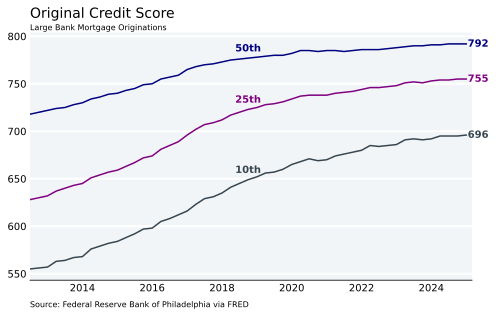

In [29]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.06, s='Original Credit Score', transform=ax.transAxes, size=14)
ax.text(0., 1.01, s='Large Bank Mortgage Originations', transform=ax.transAxes, size=8)
plt.plot(df.index, df.Rate10, color='#36454F')
plt.plot(df.index, df.Rate25, color='purple')
plt.plot(df.index, df.Rate50, color='navy')
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)

ax.set_xlim(df.index.min(), df.index.max() + pd.Timedelta(days=60))

labels = {
    'Rate10': ('10th',  '#36454F'),
    'Rate25': ('25th',  'purple'),
    'Rate50': ('50th',  'navy'),
}

for col, (pct_text, color) in labels.items():
    s = df[col].dropna()

    # 1. Final value label at the right end
    x_end = s.index[-1]
    y_end = s.iloc[-1]
    ax.text(x_end + pd.Timedelta(days=15), y_end,
            f"{y_end:.0f}", color=color, fontweight='bold',
            va='center', ha='left')

    # 2. Percentile label in the middle of the line
    mid_idx = len(s) // 2
    x_mid = s.index[mid_idx]
    y_mid = s.iloc[mid_idx]+ 10
    ax.text(x_mid, y_mid, pct_text, color=color, fontweight='bold',
            va='center', ha='center', fontsize=10)

ax.annotate("Source: Federal Reserve Bank of Philadelphia via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)
fig.savefig('./original_credit_score.png')
plt.show()